In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [2]:
data = pd.read_csv('C:/Users/Asus/Desktop/Data science/synthetic financial datasets for fraud detection/fraud_detection.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data = data.rename(columns = {'oldbalanceOrg': 'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                                    'oldbalanceDest':'oldBalanceDest', 'newbalanceDest' : 'newBalanceDest'})

In [5]:
from collections import Counter

type_list = list(data.loc[data.isFraud == 1].step.values)
type_counted_list = Counter(type_list)
type_counted_list.most_common(20)


[(212, 40),
 (523, 30),
 (249, 28),
 (387, 28),
 (425, 28),
 (501, 28),
 (730, 28),
 (160, 26),
 (398, 26),
 (66, 24),
 (406, 24),
 (625, 24),
 (694, 24),
 (22, 23),
 (6, 22),
 (34, 22),
 (74, 22),
 (149, 22),
 (250, 22),
 (262, 22)]

In [6]:
amount_list = list(data.loc[data.isFraud == 1].amount.values)

amount_counted_list = Counter(amount_list)
amount_counted_list.most_common(20)

[(10000000.0, 287),
 (0.0, 16),
 (429257.45, 4),
 (1165187.89, 4),
 (181.0, 2),
 (2806.0, 2),
 (20128.0, 2),
 (1277212.77, 2),
 (35063.63, 2),
 (25071.46, 2),
 (235238.66, 2),
 (1096187.24, 2),
 (963532.14, 2),
 (14949.84, 2),
 (18627.02, 2),
 (10539.37, 2),
 (22877.0, 2),
 (2930418.44, 2),
 (169941.73, 2),
 (13707.11, 2)]

In [7]:
nameOrig_list = list(data.loc[data.isFraud == 1].nameOrig.values)

nameOrig_counted_list = Counter(nameOrig_list)
nameOrig_counted_list.most_common(20)

[('C1305486145', 1),
 ('C840083671', 1),
 ('C1420196421', 1),
 ('C2101527076', 1),
 ('C137533655', 1),
 ('C1118430673', 1),
 ('C749981943', 1),
 ('C1334405552', 1),
 ('C467632528', 1),
 ('C1364127192', 1),
 ('C1635772897', 1),
 ('C669700766', 1),
 ('C1275464847', 1),
 ('C13692003', 1),
 ('C1872047468', 1),
 ('C1499825229', 1),
 ('C1093223281', 1),
 ('C77163673', 1),
 ('C1440057381', 1),
 ('C430329518', 1)]

In [8]:
oldBalanceOrig_list = list(data.loc[data.isFraud == 1].oldBalanceOrig.values)

oldBalanceOrig_counted_list = Counter(oldBalanceOrig_list)
oldBalanceOrig_counted_list.most_common(20)

[(10000000.0, 142),
 (0.0, 41),
 (429257.45, 4),
 (1165187.89, 4),
 (181.0, 2),
 (2806.0, 2),
 (20128.0, 2),
 (1277212.77, 2),
 (35063.63, 2),
 (25071.46, 2),
 (235238.66, 2),
 (1096187.24, 2),
 (963532.14, 2),
 (14949.84, 2),
 (18627.02, 2),
 (10539.37, 2),
 (22877.0, 2),
 (2930418.44, 2),
 (169941.73, 2),
 (13707.11, 2)]

In [9]:
type_list = list(data.loc[data.isFraud == 1].type.values)

type_counted_list = Counter(type_list)
type_counted_list.most_common(20)

[('CASH_OUT', 4116), ('TRANSFER', 4097)]

In [10]:
isFlaggedFraud_list = list(data.loc[data.isFraud == 1].isFlaggedFraud.values)

isFlaggedFraud_counted_list = Counter(isFlaggedFraud_list)
isFlaggedFraud_counted_list.most_common(20)

[(0, 8197), (1, 16)]

In [11]:
X = data.loc[(data.type == 'CASH_OUT') | (data.type == 'TRANSFER')]
randomState = 5
np.random.seed(randomState)
Y = X['isFraud']
del X['isFraud']


del X['nameDest'] 
del X['nameOrig']
del X['isFlaggedFraud']

In [12]:
X.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89


In [13]:
X_fraud = X.loc[Y==1]
X_nonFraud = X.loc[Y==0]

In [14]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
#Split the data into training and test sets in a 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = randomState)
weights = (Y==0).sum()/(1.0 *  (Y==1).sum())
xgb_classifier1 = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
xgb_prediction1 = xgb_classifier1.fit(X_train, Y_train).predict_proba(X_test)

print('AUPRC = {}'.format(average_precision_score(Y_test, xgb_prediction1[:,1])))


AUPRC = 0.8973938194567289


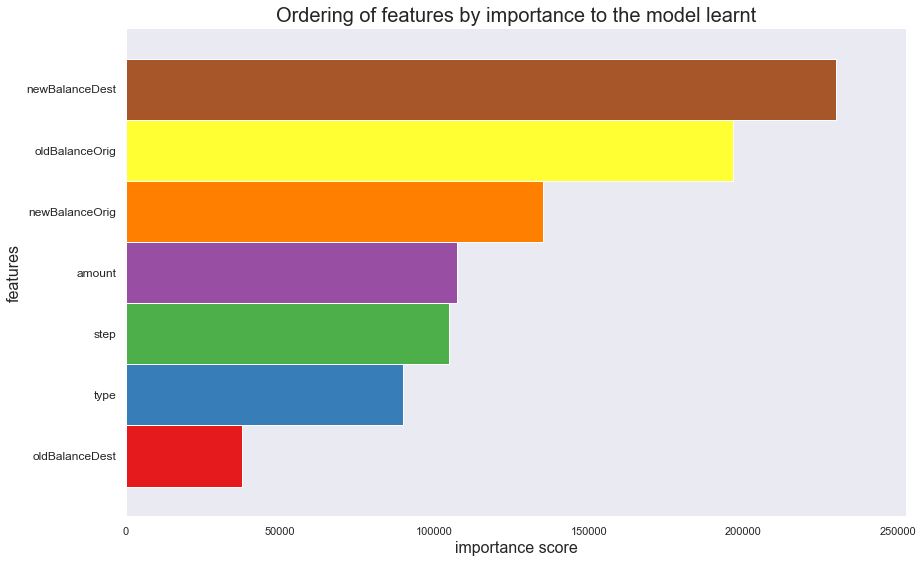

In [16]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_classifier1, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [17]:
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(X_fraud.loc[(X_fraud.oldBalanceDest == 0) & \
(X_fraud.newBalanceDest == 0) & (X_fraud.amount)]) / (1.0 * len(X_fraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(X_nonFraud.loc[(X_nonFraud.oldBalanceDest == 0) & \
(X_nonFraud.newBalanceDest == 0) & (X_nonFraud.amount)]) / (1.0 * len(X_nonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


In [18]:
X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1

The data also has several transactions with zero balances in the originating account both before and after a non-zero amount is transacted. In this case, the fraction of such transactions is much smaller in fraudulent (0.3%) compared to genuine transactions (47%). Once again, from similar reasoning as above, instead of imputing a numerical value we replace the value of 0 with a null value.

In [22]:
X.loc[(X.oldBalanceOrig == 0) & (X.newBalanceOrig == 0) & (X.amount != 0), \
      ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

In [23]:
X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = randomState)

weights = (Y==0).sum()/(1.0 *  (Y==1).sum())
xgb_classifier3 = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
xgb_prediction3 = xgb_classifier3.fit(X_train, Y_train).predict_proba(X_test)

print('AUPRC = {}'.format(average_precision_score(Y_test, xgb_prediction3[:,1])))

AUPRC = 0.9986361116985445
